## Erste DSP Übung
Die Module thinkdsp und thinkplot müssen im aktuelle Pfad vorhanden sein.
Außerdem importiert man die bekannten Matplotlib Module und numpy,
weil man sie häufig im Zusammenhang mit DSP braucht.

In [34]:
import thinkdsp
import thinkplot
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# Wenn man nicht weiß, welcher Ton, welche Frequenz darstellt, hier ein dictionary
notes_and_freqs = {'C5': 523.25, 'D5': 587.33, 'E5': 659.26, 'F5': 698.46, 'G5': 783.99,
                   'A5': 880.0, 'B5': 987.77}

Mit Hilfe des Dictionary erzeugen wir zwei phasenverschobene Sinussignale.
Wenn man die Signale "nur" um 90° bzw. pi/2 verschiebt und anschließend
addiert, so verstärken sich die Signale.

In [36]:
ein_D_0 = thinkdsp.SinSignal(freq=notes_and_freqs['D5'],amp=0.5,offset=0.0)
ein_D_90 = thinkdsp.SinSignal(freq=notes_and_freqs['D5'],amp=0.5,offset=np.pi/2)

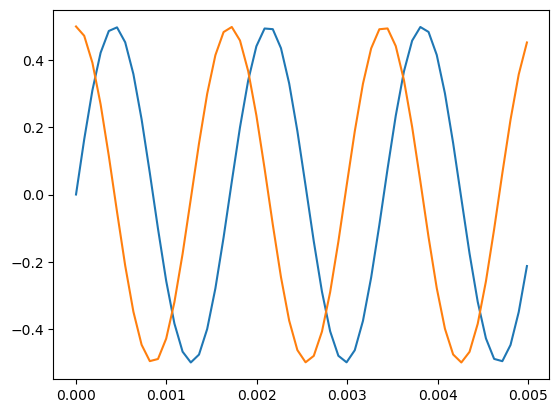

In [37]:
ein_D_0.plot()
ein_D_90.plot()

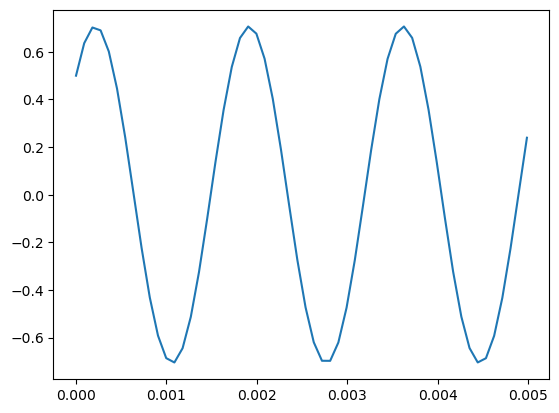

In [38]:
add_D = ein_D_0 + ein_D_90
add_D.plot()

In [66]:
#Duation steht für die Zeitliche länge des Signals

add_D_wave = add_D.make_wave(duration=1.0)
add_D_wave_L = add_D.make_wave(duration=3.0)
D0_wave = ein_D_0.make_wave(duration=1.0)
D90_wave = ein_D_90.make_wave(duration=1.0)

In [40]:
D0_wave.make_audio()

In [42]:
D90_wave.make_audio()

In [43]:
add_D_wave.make_audio()

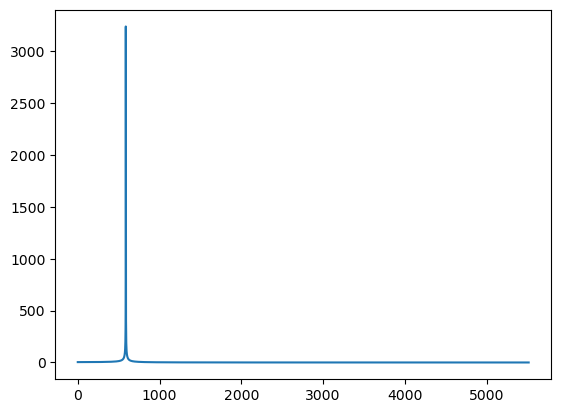

In [44]:
specAdd = add_D_wave.make_spectrum()
specAdd.plot()

Wird ein 180° phasenverschobenes Signal generiert (pi), löschen sich die Signale aus.
Das wird technisch für das sog. Noise-Cancelling benutzt und in Kopfhörern bzw.
In-Ear Systemen benutzt. 

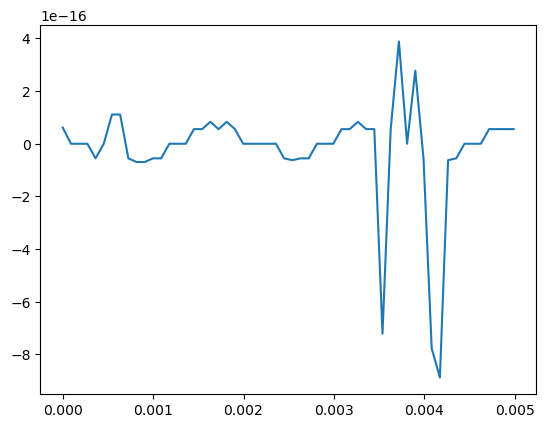

In [45]:
ein_D_0 = thinkdsp.SinSignal(freq=notes_and_freqs['D5'],amp=0.5,offset=0.0)
ein_D_180 = thinkdsp.SinSignal(freq=notes_and_freqs['D5'],amp=0.5,offset=np.pi)
add_D = ein_D_0 + ein_D_180
add_D.plot()

In [46]:
add_D_wave = add_D.make_wave(duration=1.0)
add_D_wave.make_audio()

Allerdings bleibt noch ein Rest im Signal zurück.
Im SPektrum sieht man das ebenfalls...

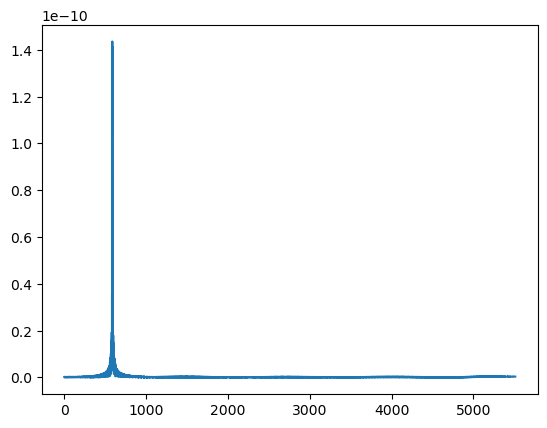

In [47]:
spec_add = add_D_wave.make_spectrum()
spec_add.plot()

In [48]:
MainPeaks = spec_add.peaks()
print(MainPeaks[0:1])

[(1.435121675491921e-10, 586.0)]


Mit .peaks() kann man aber sehen, dass die Amplitude bei weitem geringer ist.
Ein anderes Signal, welches eine zeitabhängige Frequenz aufweist ist der
Chirp. Wir erzeugen einen Chirp, der eine gesamte Oktave abdeckt, also
von 440 Hz bis 880 Hz geht.

In [67]:
chirp_sig = thinkdsp.Chirp(start=440.0, end=880.0, amp=1.0)
wowie = chirp_sig.make_wave(duration=4.0)
wowie.make_audio()

Auch dieses Signal kann man sich im Frequenzbereich ansehen.
Deutlich sind mehrere Frequenzen zu erkennen, jedoch sieht man
die zeitabhängige Frequenzänderung nicht.

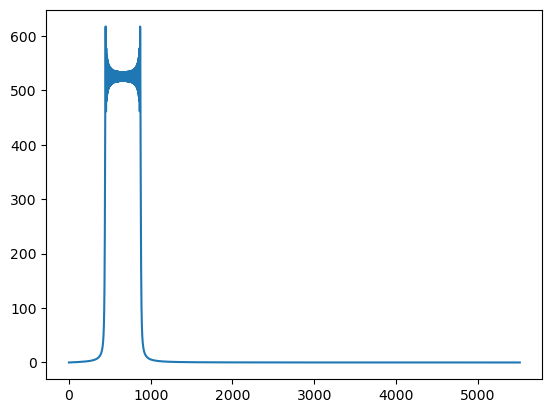

In [68]:
Spec_wow = wowie.make_spectrum()
Spec_wow.plot()

Im Zeitbereich ist es ebenfalls schwierig zu erkenne, wie sich
das Signal zetabhängig verhält. Selbst wenn man nur kurze Segmente
mit der Funktion .segment() aus dem Signal ausschneidet, ist eine
Entwicklung der Frequenz als Funktion der Zeit nicht erkennbar.

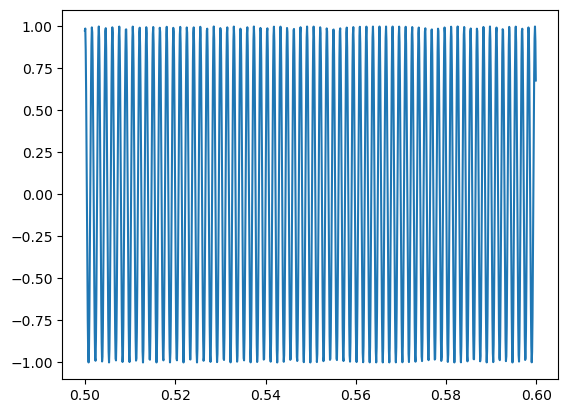

In [51]:
wowie_short = wowie.segment(start = 0.5, duration=0.1)
wowie_short.plot()

Auch eine Betrachtung der kurzen Segmente zeigt nur eine Aufweitung des
des Peaks der Hauptfrequenz. Wir benötigen also eine andere Darstllungsart,
bzw. Auswertung unseres Signals.

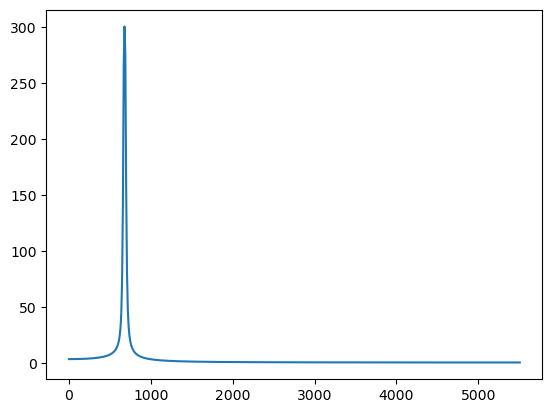

In [52]:
Specwowie_short = wowie_short.make_spectrum()
Specwowie_short.plot()

Man könnte auf die Idee kommen, mehrere Spektralanalysen der kurzen Segmente
hintereinander, für verschiedene Zeitabschnitte durchzuführen, so würde
man eine zeiliche Abhängigkeit der Frequenz visualisieren können.
Genau das macht die Funktion .make_spectrogram(), wobei hier ein Parameter,
die Länge des einzelnen zu generierenden Spektrums, angegeben werden muss. 

In [53]:
spectro_Wowoie = wowie.make_spectrogram(128)

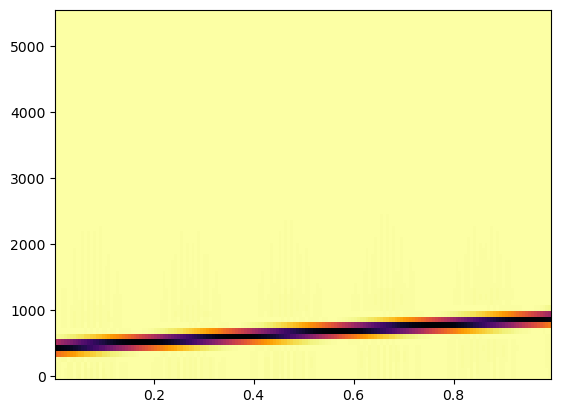

In [54]:
spectro_Wowoie.plot()

Mit Hilfe des Spektrogramms kann man jetzt deutlich die als Funktion der Zeit ansteigende Frequenz erkennen.
Es ist genau zu sehen, dass die Frequenz innerhalb einer Sekunde linear ansteigt.
Spektrogramme werden z.B. in der Spracherkennung eingesetzt, da sie als Bilder
repräsentativ für die einzeln ausgesprochenen Bestandteile der menschlichen
Sprache sind. Man kann aber noch viel mehr damit machen ;).
Als Beispiel das Spektrogramm für das gesprochene Wort "zwei" und dem Vokal "A".

In [55]:
it2_wave = thinkdsp.read_wave('IT22301t.wav')

In [56]:
it2_wave.make_audio()

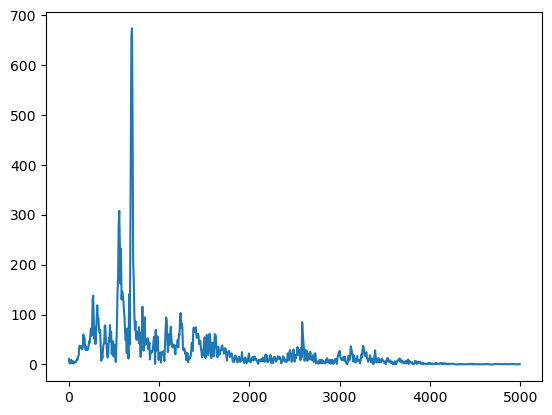

In [57]:
specit2 = it2_wave.make_spectrum()
specit2.plot(high=5000)

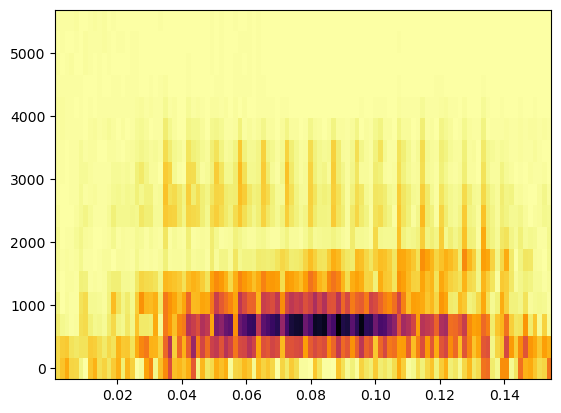

In [58]:
spectroit2 = it2_wave.make_spectrogram(128)
spectroit2.plot(high=6000)

In [59]:
it3_wave = thinkdsp.read_wave('AKurz.wav')
A_short_Wave = it3_wave.segment(start=0.1,duration=0.15)

In [60]:
it3_wave.make_audio()

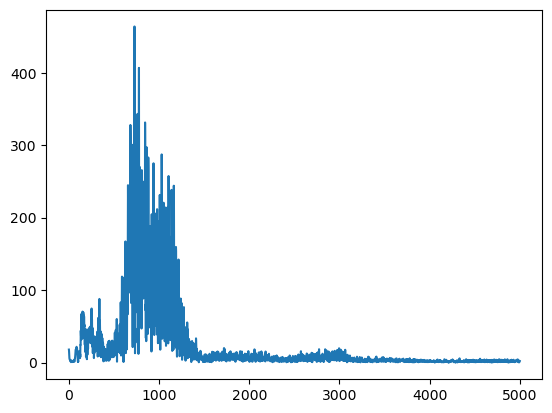

In [61]:
specit3 = it3_wave.make_spectrum()
specit3.plot(high=5000)

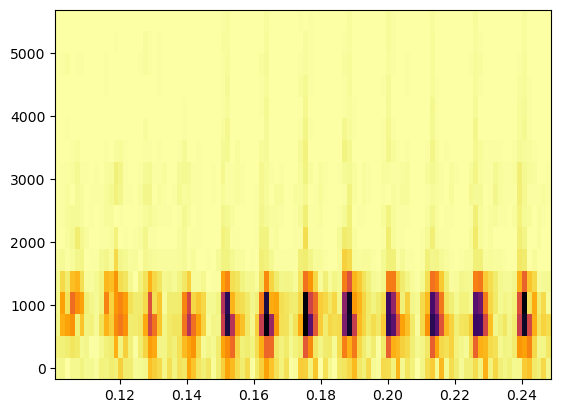

In [62]:
spectro_A_short = A_short_Wave.make_spectrogram(128)
spectro_A_short.plot(high=6000)

Nach Anpassung der Länge beider Waves - die A-wave ist ein wenig länger - kann man die Spektrogramme
vergleichen und deutliche Unterschiede erkennen. Mit entsprechenden Klassifikaitonsmethoden kann
man so Sprache erkennen.

Folgendes interaktives Beispiel soll den Aliasing Effekt verdeutlichen.
Hier kann mit Slidern die Hauptfrequenz des erzeugten Signals und die
Abtastrate verändert werden. Auch kann man die Form des Signals verändern,
indem man anstatt einer reinen Sinusfunktion, z.B. einen Sägezahn oder ein
Rechteck-Signal generiert.
Hier ist die Doku des thinkdsp packages:
https://greenteapress.com/thinkdsp/thinkdsp.html

In [63]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

In [64]:
def view_harmonics(freq, framerate):
    signal = thinkdsp.SquareSignal(freq)
    wave = signal.make_wave(duration=0.5, framerate=framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color='blue')
    thinkplot.show(xlabel='frequency', ylabel='amplitude')
    display(wave.make_audio())

In [65]:
slider1 = widgets.FloatSlider(min=100, max=20000, value=500, step=100)
slider2 = widgets.FloatSlider(min=500, max=44000, value=10000, step=500)
interact(view_harmonics, freq=slider1, framerate=slider2);

interactive(children=(FloatSlider(value=500.0, description='freq', max=20000.0, min=100.0, step=100.0), FloatS…